In [22]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Iris dataset

Load the Iris dataset

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
print (iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [25]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


Keep only the first 2 variables and data with y-values equal to 0 and 1

In [26]:
X = iris.data[:,[2,3]]
y = iris.target
T = []
u = []
for i in range(0,len(y)):
    if y[i] == 0 or y[i] == 1:
        T.append(X[i])
        u.append(y[i])

Split the data into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    T, u, random_state=0)

Normalise data

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Linear regression Perceptron

Define the Perceptron with a step function activation function

In [29]:
class LinearPerceptron:
    def __init__(self,eta,nepochs):
        self.eta = eta
        self.nepochs = nepochs
        
    def activation(self,xdata,index):
        return np.dot(self.weights[1:],xdata[index]) + self.weights[0]
    
    def fit(self,xtrain,ytrain):
        self.weights = np.random.rand(len(xtrain[0])+1)
        for j in range(self.nepochs):
            for i in range(len(xtrain)):
                ypred = 0
                if self.activation(xtrain,i) >= 0:
                    ypred = 1
                self.weights[0] += self.eta*(ytrain[i] - ypred)
                self.weights[1:] += self.eta*(ytrain[i] - ypred)*xtrain[i]
        return self
    
    def predict(self,xtest):
        ypred = np.zeros((len(xtest)))
        for i in range(len(xtest)):
            if self.activation(xtest,i) >= 0:
                ypred[i] = 1
        return ypred

Set the initial parameters of the model

In [30]:
ppn = LinearPerceptron(0.1,40)

Fit the model

In [31]:
ppn.fit(X_train,y_train)

Test the model

In [32]:
y_pred = ppn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


Plot the model

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
                       test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=cmap(idx),
                       marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

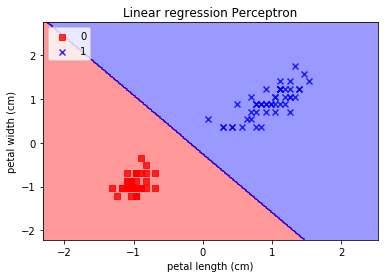

In [34]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
#plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn)
plt.title(r'Linear regression Perceptron')
plt.xlabel(r'petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')

plt.savefig("LinearPerceptron.png", dpi = 300)

## Logistic sigmoid Perceptron

Define the Perceptron with a logistic sigmoid activation function

In [35]:
class LogPerceptron:
    def __init__(self,eta,nepochs):
        self.eta = eta
        self.nepochs = nepochs
        
    def activation(self,xdata,index):
        return 1 / (1+np.exp(-np.dot(self.weights[1:],xdata[index]))) + self.weights[0]
    
    def fit(self,xtrain,ytrain):
        self.weights = np.random.rand(len(xtrain[0])+1)
        for j in range(self.nepochs):
            for i in range(len(xtrain)):
                ypred = 0
                if self.activation(xtrain,i) >= 0:
                    ypred = 1
                self.weights[0] += self.eta*(ytrain[i] - ypred)
                self.weights[1:] += self.eta*(ytrain[i] - ypred)*xtrain[i]
        return self
    
    def predict(self,xtest):
        ypred = np.zeros((len(xtest)))
        for i in range(len(xtest)):
            if self.activation(xtest,i) >= 0:
                ypred[i] = 1
        return ypred

Set the initial parameters of the model

In [36]:
ppn = LogPerceptron(0.1,40)

Fit the model

In [37]:
ppn.fit(X_train,y_train)

Test the model

In [38]:
y_pred = ppn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


Plot the model

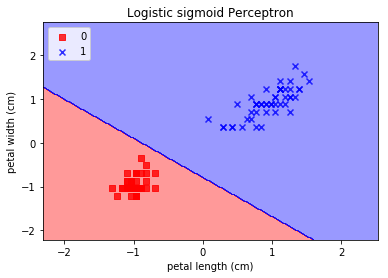

In [39]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
#plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn)
plt.title(r'Logistic sigmoid Perceptron')
plt.xlabel(r'petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')

plt.savefig("LogPerceptron.png", dpi = 300)